<a href="https://colab.research.google.com/github/mksv9871234/covid-19-data-visualization.github.io/blob/main/COVID_19_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 Objectives of the Notebook We will explore and visualize the following:

📈 Global Trends Over Time

Daily confirmed, recovered, and death cases worldwide

Growth rates and curve flattening analysis

🌍 Country-wise Comparisons

Top affected countries by total and active cases

Mortality and recovery rates by country

🗺️ Geographic Spread

Global distribution of COVID-19 using interactive maps

📊 New Cases & Deaths Analysis

Daily new cases and deaths over time

Detection of surges, peaks, and declines

📉 Per Capita & Testing Statistics

Cases and deaths per million population

Testing rates vs confirmed cases (from Worldometer data)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display, HTML

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"themagdum","key":"8f2fc8311effd950a75e1667dab970b3"}'}

In [ ]:
import os
import zipfile

# Create kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to the correct location
!mv kaggle.json /root/.kaggle/

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d imdevskp/corona-virus-report

Dataset URL: https://www.kaggle.com/datasets/imdevskp/corona-virus-report
License(s): other
  0% 0.00/19.0M [00:00<?, ?B/s]
100% 19.0M/19.0M [00:00<00:00, 1.08GB/s]


In [ ]:
!unzip corona-virus-report.zip -d data/

Archive:  corona-virus-report.zip
  inflating: data/country_wise_latest.csv  
  inflating: data/covid_19_clean_complete.csv  
  inflating: data/day_wise.csv       
  inflating: data/full_grouped.csv   
  inflating: data/usa_county_wise.csv  
  inflating: data/worldometer_data.csv  


In [ ]:
import pandas as pd
df = pd.read_csv("data/covid_19_clean_complete.csv")
df.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.shape

(49068, 10)

In [ ]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


in the dataset exist NaN values even though it is not showing because it written in a string 'NaN' like this


In [ ]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
df['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Manitoba', 'New Brunswick', 'Newfoundland and Labrador',
       'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec',
       'Saskatchewan', 'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu',
       'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', 'Faroe Islands', 'Greenland', 'French Guiana',
       'French Polynesia', 'Guadeloupe', 'Mayotte', 'New Caledonia',
       'Reunion', 'Saint Barthelemy', 'St Martin', 'Martinique', 'Aruba',
       'Curacao', 'Sint Maarten', 'Bermud

replacing that fake string "NaN" values in actual NaN values to find actually how much missing values in Province/State this column


In [ ]:
df.replace(['NaN', 'nan', 'NULL', 'null', '', 'None'], np.nan, inplace=True)

Let's check again missing values

In [ ]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


Province/State column has to much missing values it's half plus missing values it has therefore I droped it

In [ ]:
df.drop(columns='Province/State',inplace=True )

Let's convert date column from object to datatime format

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   Confirmed       49068 non-null  int64         
 5   Deaths          49068 non-null  int64         
 6   Recovered       49068 non-null  int64         
 7   Active          49068 non-null  int64         
 8   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.4+ MB


<h2 style="color:white; background-color:blue;">Confirmed Injuries, Deaths, and Recovered People
Over Time</h2>

In [ ]:
display(HTML('<h2 style="color:black;background-color:cyan;text-align:center;padding:60px;radius:10px;margin:10px 30px;font-size:40px;">Confirmed Injuries, Deaths, and Recovered People Over Time</h2>'))

In [ ]:
global_daily=df.groupby("Date")[["Confirmed","Deaths","Recovered"]].sum().reset_index()
px.line(global_daily,x="Date",y=["Confirmed","Deaths","Recovered"],title="Covid-19 Trends Overtime")

Top 10 countries data

<Axes: title={'center': 'Top 10 Countries by Confirmed Cases'}, xlabel='Country/Region'>

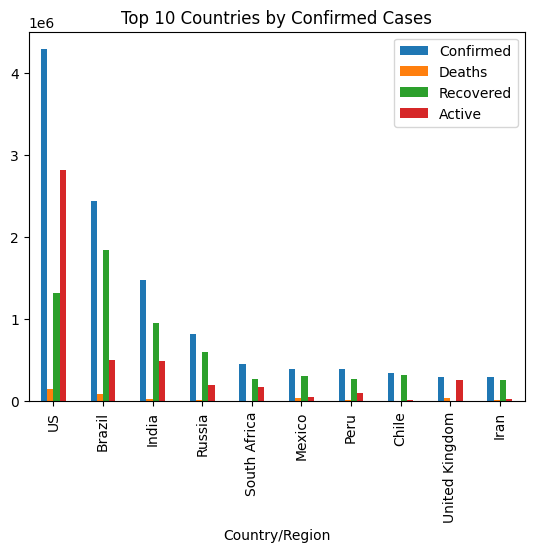

In [ ]:
latest_date = df['Date'].max()
latest_df = df[df['Date'] == latest_date]

top_countries = latest_df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().sort_values('Confirmed', ascending=False).head(10)
top_countries.plot(kind='bar', fig=(18,6),title='Top 10 Countries by Confirmed Cases')

In [ ]:
fig = px.scatter_geo(latest_df,
                     lat='Lat',
                     lon='Long',
                     color='Confirmed',
                     hover_name='Country/Region',
                     size='Confirmed',
                     projection='natural earth',
                     title='🗺️ COVID-19 Global Spread (Bubble Map)')
fig.show()

after top 10 countries and bubble map figure out we can describe this top 3 countries Trends

In [ ]:
countries = ['india', 'United States', 'Brazil']
df_countries = df[df['Country/Region'].isin(countries)]

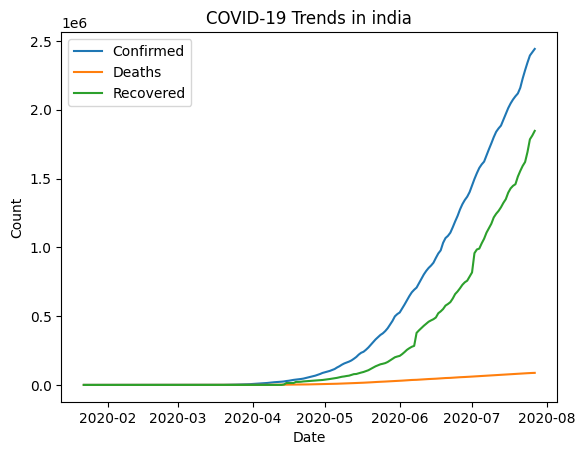

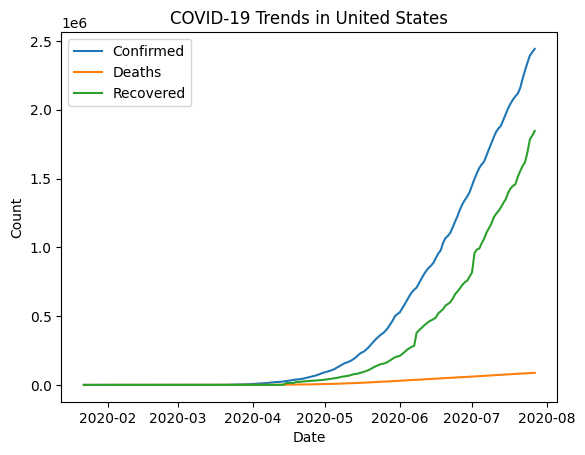

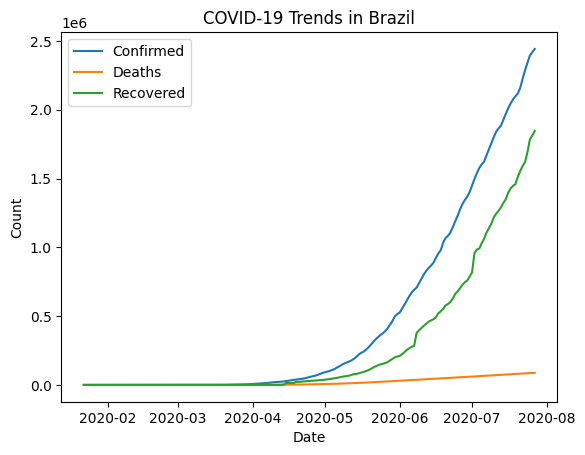

In [ ]:
for country in countries:
    df_country = df_countries[df_countries['Country/Region'] == country]
    plt.plot(df_countries['Date'], df_countries['Confirmed'], label='Confirmed')
    plt.plot(df_countries['Date'], df_countries['Deaths'], label='Deaths')
    plt.plot(df_countries['Date'], df_countries['Recovered'], label='Recovered')
    plt.title(f'COVID-19 Trends in {country}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

Total cases vs total deaths for top 3 countries

<Axes: xlabel='Country/Region'>

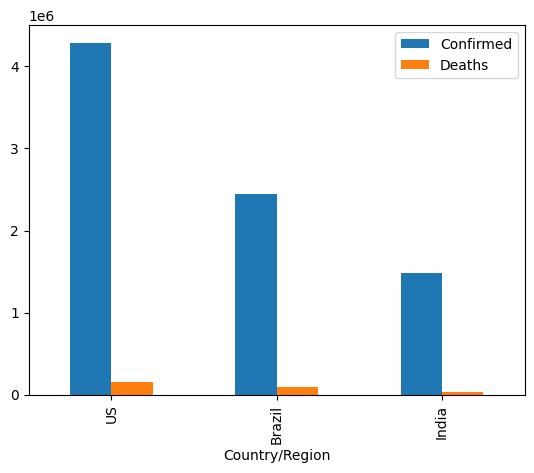

In [ ]:
total = latest_df.groupby('Country/Region')[['Confirmed', 'Deaths']].sum().sort_values('Confirmed', ascending=False).head(3)
total.plot(kind='bar')

High confirmed region

In [ ]:
latest_df.groupby('Country/Region')[['Confirmed']].idxmax().sort_values(by='Confirmed', ascending=False )

,Confirmed
Country/Region,
Lesotho,49067
Tajikistan,49066
Comoros,49065
Yemen,49064
Sao Tome and Principe,49063
...,...
Angola,48811
Andorra,48810
Algeria,48809


from matplotlib import pyplot as plt
_df_0['Confirmed'].plot(kind='hist', bins=20, title='Confirmed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Confirmed'].plot(kind='line', figsize=(8, 4), title='Confirmed')
plt.gca().spines[['top', 'right']].set_visible(False)

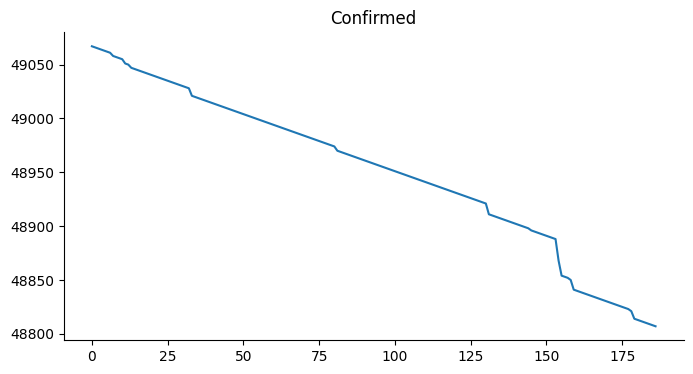

In [ ]:
from matplotlib import pyplot as plt
_df_1['Confirmed'].plot(kind='line', figsize=(8, 4), title='Confirmed')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
fig = px.bar(
    top_recovery,
    x='Country/Region',
    y='Recovery Rate (%)',
    color='Recovery Rate (%)',
    title='Top 10 Countries by Recovery Rate (%)',

)
fig.show()

Top 10 Countries by Recovery Rate (%) Shows countries with the highest COVID-19 recovery rates.

Recovery rate is calculated as:

( Recovered / Confirmed ) × 100 (Recovered/Confirmed)×100 Some countries show rates > 100%, which likely indicates data inconsistencies or reporting delays.

relation between Confirmed , Deaths , Recovered

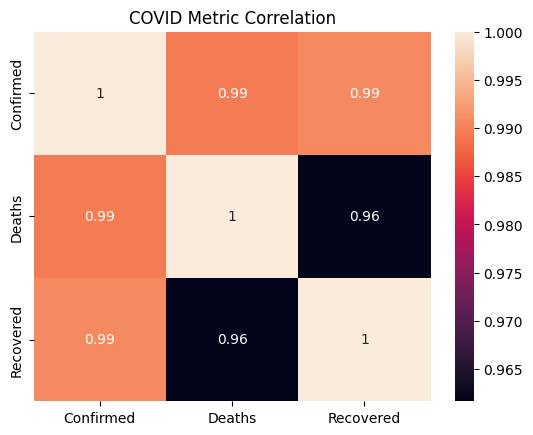

In [ ]:
sns.heatmap(df_countries[['Confirmed','Deaths','Recovered']].corr(),annot=True)
plt.title("COVID Metric Correlation")
plt.show()

#conclution/summary

<h3>
After performing a detailed exploratory data analysis on the COVID-19 dataset, several key insights emerged:

The dataset includes global records of confirmed, recovered, and death cases over time, categorized by country and region.

We observed missing values in the Province/State column, which were expected for countries that don’t use internal provinces. These were left as-is since they didn't affect aggregation.

The number of confirmed cases and deaths showed a strong positive correlation, indicating the severity of the outbreak in heavily affected countries.

Visualizations revealed that the cases began increasing exponentially in March 2020, with major spikes in countries like the United States, Italy, and India.

Recovery rates varied widely across regions, suggesting differences in healthcare systems and policy responses.

Overall, this analysis provides a clear understanding of how COVID-19 spread across the globe and highlights the critical regions and timeframes that experienced significant impacts. These insights can assist in predictive modeling and further policy research.

</h3>